# Lecture 18

## Least Squares Fit

What would be the best model to describe some set of data? We essentially want to find $f$ for the model $y = f(x)$. Let our starting model be $f(x) = a_{0} + a_{1} x + a_{2} x^{2} + \dots$. We can just use $f(x) = a_{0} + a_{1} x$. We want to find the best parameters to describe our model so that we can have better predictions (basis for linear regression in ML too!). So, we have a set of values $x_{i}, y_{i}, Y_{i}, \Delta_i = Y_{i} - y_{i}$. $\Delta_{i}$ has to be random and we can say that it has a distribution (let us consider it to be Gaussian). The mean has to be zero, otherwise there is likely some sort of bias. What is the probability that we will have $\Delta_{i}$ set of deviations?

$\text{Total Probability} = \prod_{i} P(\Delta_{i}) = \prod_{i} e^{-\Delta_{i}^{2}/2\sigma^{2}} = e^{-\frac{1}{2\sigma^{2}} \sum (y_{i} - Y_{i})^{2}}$

We need to maximise this probability so that the deviations are purely random and independent. Therefore, we choose $Y_{i}$ such that $\sum_{i} (y_{i} - Y_{i})^{2}$ is minimum.

$\implies \sum_{i} (y_{i} - a_{0} - a_{1}x_{i})^{2} \equiv \Delta$ is minimum with respect to $a_{0}$ and $a_{1}$.

Our correction is given by $\frac{\partial \Delta}{\partial a_{0}} = \frac{\partial \Delta}{\partial a_{1}} = 0$.

$\implies \sum_{i} (y_{i} - a_{0} - a_{1}x_{i}) = 0$ and $\sum_{i} (y_{i} - a_{0} - a_{1}x_{i})x_{i} = 0$

$\implies \frac{1}{n} \sum_{i} (y_{i} - a_{0} - a_{1}x_{i}) = 0$ and $\frac{1}{n} \sum_{i} (y_{i} - a_{0} - a_{1}x_{i})x_{i} = 0$

$\implies \frac{\sum y_{i}}{n} - a_0 - a_{1} \frac{\sum x_{i}}{n} = 0 \Rightarrow a_{0} + a_1 \bar{x} = \bar{y}$

Also $\frac{\sum y_{i}x_{i}}{n} - a_0\frac{\sum x_{i}}{n} - a_{1} \frac{\sum x_{i}^{2}}{n} = 0 \Rightarrow a_{0}\bar{x} + a_{1}\overline{x^{2}} = \overline{xy}$

Now, we have the expressions

$a_{0} + a_1 \bar{x} = \bar{y}$ and

$a_{0}\bar{x} + a_{1}\overline{x^{2}} = \overline{xy}$

Let us define $A = \begin{pmatrix} 1 & \bar{x} \\ \bar{x} & \overline{x^{2}} \end{pmatrix}$.

We have $A \begin{pmatrix} a_{0} \\ a_{1} \end{pmatrix} = \begin{pmatrix} \bar{y} \\ \overline{xy} \end{pmatrix}$

$\implies \begin{pmatrix} a_{0} \\ a_{1} \end{pmatrix} = A^{-1} \begin{pmatrix} \bar{y} \\ \overline{xy} \end{pmatrix}$

where $A^{-1} = \frac{1}{\overline{x^{2}} - \bar{x}^{2}} \begin{pmatrix} \overline{x^{2}} & -\bar{x} \\ -\bar{x} & 1 \end{pmatrix} = \frac{1}{\sigma^{2}}\begin{pmatrix} \overline{x^{2}} & -\bar{x} \\ -\bar{x} & 1 \end{pmatrix}$

So, our test here is $\boxed{\chi^{2} = \sum_{i} \frac{(y_{i} - Y_{i})^{2}}{\sigma^{2}}}$

**Algorithm for Mock Data:**

We want to generate noisy data in $Y$.

1. We generate $x_{i}$​ such that it belongs to $[0, 1]$

2. Also, generate $y_{i} = a_{0} + a_{1} x_{i} + \text{ noise}$using some initial true parameters that we set,with noise sampled from a normal distribution

3. Use least squares to solve $\begin{pmatrix} 1 & \bar{x} \\ \bar{x} & \overline{x^{2}} \end{pmatrix} \begin{pmatrix} a_{0} \\ a_{1} \end{pmatrix} = \begin{pmatrix} \bar{y} \\ \overline{xy} \end{pmatrix}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# true parameters
true_a0 = 1.0
true_a1 = 2.0 # both chosen randomly
sigma = 1.0  # standard deviation of Gaussian noise

n = 100  # data points
x = np.linspace(0, 1, n)
noise = np.random.normal(0, sigma, size=n)
y = true_a0 + true_a1 * x + noise

# all means
x_mean = np.mean(x)
y_mean = np.mean(y)
x2_mean = np.mean(x**2)
xy_mean = np.mean(x * y)

# matrix and vector b = (mean(y) mean(xy))
A = np.array([[1, x_mean],
              [x_mean, x2_mean]])
b = np.array([y_mean, xy_mean])

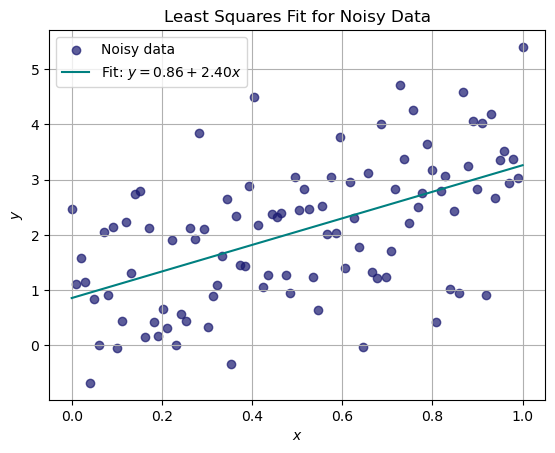

In [31]:
params = np.linalg.solve(A, b) # we are solving for coefficients here
a0_fit, a1_fit = params
y_fit = a0_fit + a1_fit * x # fit

plt.scatter(x, y, label = 'Noisy data', alpha = 0.7, color = 'midnightblue')
plt.plot(x, y_fit, label = f'Fit: $y = {a0_fit:.2f} + {a1_fit:.2f}x$', color = 'teal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Least Squares Fit for Noisy Data')
plt.legend()
plt.grid(True)
plt.show()